In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [46]:
df = pd.read_csv('crx.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [47]:
df[15].value_counts()

15
-    383
+    307
Name: count, dtype: int64

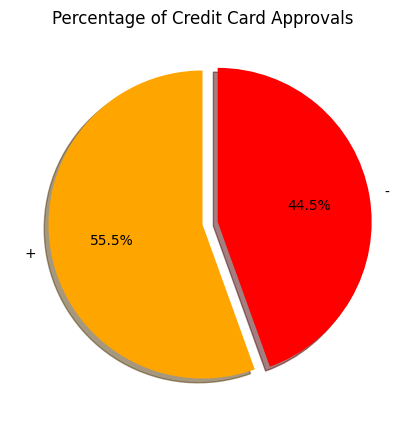

In [48]:
data_size = df[15].value_counts(sort=True)
colors = ["orange", "red"]
rcParams['figure.figsize'] = (5, 5)

labels = ('+', '-')
explode = (0, 0.1)

plt.pie(data_size, colors=colors, labels=labels, explode=explode, shadow=True, startangle=90, autopct="%1.1f%%")
plt.title("Percentage of Credit Card Approvals")
plt.show()

In [49]:
df_description = df.describe()
print(df_description, end='\n\n')

df_info = df.info()
print(df_info, end='\n\n')

df.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [50]:
df.replace('?', np.nan, inplace=True)

In [51]:
df[0].value_counts()

0
b    468
a    210
Name: count, dtype: int64

In [52]:
df.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [53]:
for col in df.columns:

    if df[col].dtypes == "object":
        df[col].fillna(df[col].value_counts().index[0], inplace=True)

In [54]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [55]:
df = df.apply(LabelEncoder().fit_transform)

<Axes: >

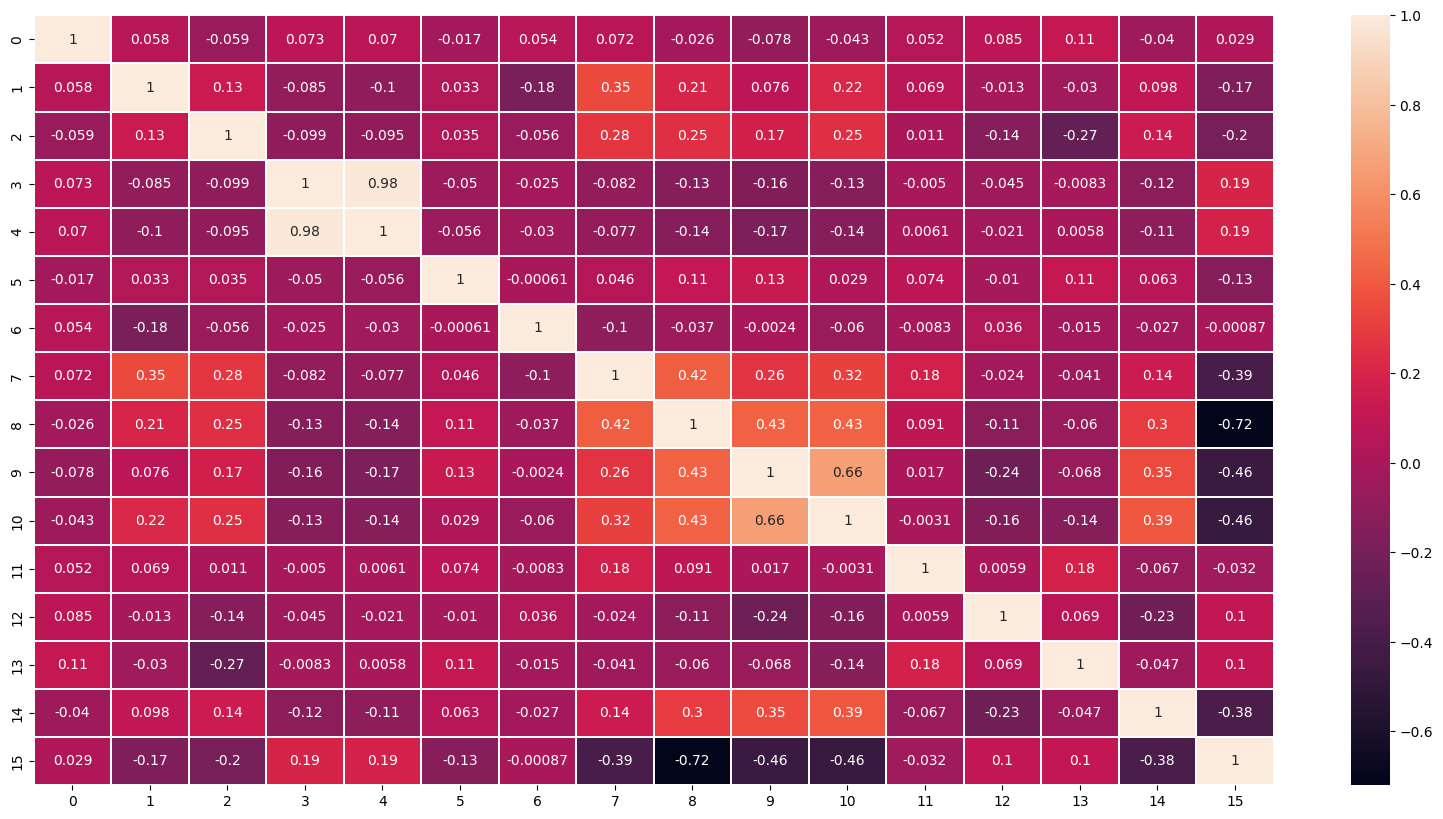

In [56]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, linewidths=0.1)

In [57]:
df.corr()[15]

0     0.028934
1    -0.166966
2    -0.202400
3     0.194306
4     0.185134
5    -0.130434
6    -0.000866
7    -0.385006
8    -0.720407
9    -0.458301
10   -0.462489
11   -0.031625
12    0.100867
13    0.100933
14   -0.381625
15    1.000000
Name: 15, dtype: float64

In [68]:
feature_names = []

for idx, feature in enumerate(df.corr()[15].abs() > 0.18):
    if feature == True and idx != 15:
        feature_names.append(idx)

In [69]:
feature_names

[2, 3, 4, 7, 8, 9, 10, 14]

In [70]:
X = df[feature_names]
y = df[15]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [74]:
rescaledX_train

array([[0.92417062, 0.5       , 0.        , ..., 1.        , 0.5       ,
        0.79497908],
       [0.1563981 , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.34728033],
       [0.7014218 , 0.5       , 0.        , ..., 1.        , 0.36363636,
        0.        ],
       ...,
       [0.14218009, 0.5       , 0.        , ..., 1.        , 0.18181818,
        0.72803347],
       [0.11848341, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34123223, 0.5       , 0.        , ..., 1.        , 0.04545455,
        0.09205021]])

In [75]:
rescaledX_test

array([[0.55140187, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.21212121],
       [0.02336449, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09813084, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.91121495, 0.5       , 0.        , ..., 1.        , 0.66666667,
        0.80952381],
       [0.40186916, 0.5       , 0.        , ..., 1.        , 0.14285714,
        0.81818182],
       [0.03738318, 0.5       , 0.        , ..., 1.        , 0.52380952,
        0.20779221]])

In [76]:
rescaledX_train = pd.DataFrame(rescaledX_train, columns=feature_names)
rescaledX_test = pd.DataFrame(rescaledX_test, columns=feature_names)


In [77]:
rescaledX_train

,2,3,4,7,8,9,10,14
0,0.924171,0.5,0.0,0.692308,1.0,1.0,0.500000,0.794979
1,0.156398,0.5,0.0,0.130769,0.0,0.0,0.000000,0.347280
2,0.701422,0.5,0.0,0.815385,1.0,1.0,0.363636,0.000000
3,0.123223,1.0,1.0,0.130769,0.0,0.0,0.000000,0.000000
4,0.336493,0.5,0.0,0.015385,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
457,0.943128,1.0,1.0,0.576923,1.0,0.0,0.000000,0.000000
458,0.018957,1.0,1.0,0.023077,0.0,0.0,0.000000,0.179916
459,0.142180,0.5,0.0,0.146154,1.0,1.0,0.181818,0.728033
460,0.118483,0.5,0.0,0.100000,0.0,0.0,0.000000,0.000000


In [79]:
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train.values.ravel())

LogisticRegression()

In [81]:
y_pred = logreg.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))


Accuracy of logistic regression classifier:  0.8464912280701754
Confusion matrix:  [[ 88  13]
 [ 22 105]]


In [82]:
tol = [0.01,0.001, 0.0001]
max_iter = [100,150,200]

param_grid = dict(tol=tol, max_iter=max_iter)

In [83]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
rescaledX = scaler.fit_transform(X)
grid_model_result = grid_model.fit(rescaledX, y.values.ravel())

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.846377 using {'max_iter': 100, 'tol': 0.01}
